# Project : WeRateDogs Wrangle and Analyse Data

## Table of Contents

<ul>
<li><a href="intro">Introduction</a></li>   
<li><a href="#gathering">Gathering Data</a></li>
<li><a href="#assessing">Assessing Data</a></li>
<li><a href="#cleaning">Cleaning Data</a></li>
<li><a href="#store">Storing</a></li>
<li><a href="#analyzevisualize">Analyzing and Visualizing</a></li>        
<li><a href="references">References</a></li>   
</ul>

## Introduction

##### The purpose of this project is to wrangle and analyse the dataset which is gathered from csv file , tsv file which is hosted on udacity server and must be downloaded programmatically and the entire set of json data from WeRateDogs Twitter archive from twitter API using Python's Tweepy library which needs to be assessed ,cleaned and analyzed.

## Importing necessary Libraries

In [1]:
import numpy as np
# importing numpy with alias as np

import pandas as pd
# importing pandas with alias as pd

import matplotlib.pyplot as plt
# importing  matplotlib.pyplot with alias as plt 

%matplotlib inline
# This is the magic word used so that the visualizations using matplotlib will be plotted inline  within the jupyter notebook

In [2]:
pd.set_option('display.max_columns',None)
# We want to look at all of the columns in the output,so we set the option to display all of them.

In [3]:
pd.set_option('display.max_rows',None)
# We want to look at all of the rows in the output,so we set the option to display all of them.

In [4]:
pd.set_option('display.expand_frame_repr',False)
# print full dataframe across multiple lines 

In [5]:
pd.set_option('max_colwidth', 1000)
# sets max width to 1000px, per column.

In [6]:
import seaborn as sns
# Importing seaaborn with alias as sns

In [7]:
import requests
# The requests module allows you to send HTTP requests using Python

import os
# OS module provides allows you to interface with the underlying operating system that Python is running on

In [8]:
import tweepy
# download the json data from twitter 

In [9]:
import json
# for encoding and decoding json data

In [211]:
from PIL import Image
# Python Imaging Library that adds support for opening, manipulating, and saving many different image file formats.

from io import BytesIO
# The io module provides Python's main facilities for dealing with various types of I/O

## Gathering Data

### Twitter Archive

In [10]:
twitter_archive = pd.read_csv('twitter-archive-enhanced.csv')
# read the csv file

In [11]:
twitter_archive.head()
# first five rows of the dataframe

tweet_id  in_reply_to_status_id  in_reply_to_user_id                  timestamp                                                                              source                                                                                                                                                                text  retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp                                                                                                                    expanded_urls  rating_numerator  rating_denominator      name doggo floofer pupper puppo
0  892420643555336193                    NaN                  NaN  2017-08-01 16:23:56 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                  NaN                       NaN                        NaN                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1                13                  10   Phineas  None    None   None  None
1  892177421306343426                    NaN                  NaN  2017-08-01 00:17:27 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV                  NaN                       NaN                        NaN                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1                13                  10     Tilly  None    None   None  None
2  891815181378084864                    NaN                  NaN  2017-07-31 00:18:03 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                  NaN                       NaN                        NaN                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1                12                  10    Archie  None    None   None  None
3  891689557279858688                    NaN                  NaN  2017-07-30 15:58:51 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                  NaN                       NaN                        NaN                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1                13                  10     Darla  None    None   None  None
4  891327558926688256                    NaN                  NaN  2017-07-29 16:00:24 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f                  NaN                       NaN                        NaN  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1                12                  10  Franklin  None    None   None  None

In [12]:
twitter_archive.shape

(2356, 17)

In [13]:
twitter_archive['tweet_id'][1000]
# random tweet_id

747963614829678593

### Image Predictions

In [14]:
url = ' https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
# url where tsv file is hosted 

response = requests.get(url)


In [15]:
response
# response is successful

<Response [200]>

In [16]:
folder_name = 'image-predictions'

In [17]:
# Make directory if it doesn't already exist
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

In [15]:
# writing the content into the file
with open(os.path.join(folder_name,url.split("/")[-1]),mode = 'wb') as file:
        file.write(response.content)

In [18]:
image_prediction = pd.read_csv('image-predictions\image-predictions.tsv',sep = '\t')
# read the tsv file

In [19]:
image_prediction.head()
# first five rows of tsv file

tweet_id                                          jpg_url  img_num                      p1   p1_conf  p1_dog                  p2   p2_conf  p2_dog                   p3   p3_conf  p3_dog
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1  Welsh_springer_spaniel  0.465074    True              collie  0.156665    True    Shetland_sheepdog  0.061428    True
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1                 redbone  0.506826    True  miniature_pinscher  0.074192    True  Rhodesian_ridgeback  0.072010    True
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1         German_shepherd  0.596461    True            malinois  0.138584    True           bloodhound  0.116197    True
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1     Rhodesian_ridgeback  0.408143    True             redbone  0.360687    True   miniature_pinscher  0.222752    True
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1      miniature_pinscher  0.560311    True          Rottweiler  0.243682    True             Doberman  0.154629    True

### Twitter API Data

https://stackoverflow.com/questions/28384588/twitter-api-get-tweets-with-specific-id

In [14]:
twitter_key = "HIDDEN"
twitter_secret_key = "HIDDEN"
twitter_token = "HIDDEN"
twitter_token_secret = "HIDDEN"

In [15]:
auth = tweepy.OAuthHandler(twitter_key,twitter_secret_key)
auth.set_access_token(twitter_token,twitter_token_secret)

In [16]:
api = tweepy.API(auth_handler=auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)

In [24]:
random_tweet = api.get_status(twitter_archive['tweet_id'][1000] , tweet_mode = 'extended')

In [25]:
json_data = random_tweet._json

In [26]:
json_data

{'created_at': 'Wed Jun 29 01:23:16 +0000 2016',
 'id': 747963614829678593,
 'id_str': '747963614829678593',
 'full_text': 'PUPPER NOOOOO BEHIND YOUUU 10/10 pls keep this pupper in your thoughts https://t.co/ZPfeRtOX0Q',
 'truncated': False,
 'display_text_range': [0, 70],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 747963600220917761,
    'id_str': '747963600220917761',
    'indices': [71, 94],
    'media_url': 'http://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CmFM7ngXEAEitfh.jpg',
    'url': 'https://t.co/ZPfeRtOX0Q',
    'display_url': 'pic.twitter.com/ZPfeRtOX0Q',
    'expanded_url': 'https://twitter.com/dog_rates/status/747963614829678593/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'medium': {'w': 937, 'h': 632, 'resize': 'fit'},
     'small': {'w': 680, 'h': 459, 'resize': 'fit'},
     'large': {'w': 937, 'h': 632, '

In [39]:
json_data['id']

747963614829678593

In [27]:
json_data['user']

{'id': 4196983835,
 'id_str': '4196983835',
 'name': 'WeRateDogs®',
 'screen_name': 'dog_rates',
 'location': '「 DM YOUR DOGS 」',
 'description': 'Your Only Source For Professional Dog Ratings Instagram and Facebook ➪ WeRateDogs partnerships@weratedogs.com ⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀',
 'url': 'https://t.co/Wrvtpnv7JV',
 'entities': {'url': {'urls': [{'url': 'https://t.co/Wrvtpnv7JV',
     'expanded_url': 'https://blacklivesmatters.carrd.co',
     'display_url': 'blacklivesmatters.carrd.co',
     'indices': [0, 23]}]},
  'description': {'urls': []}},
 'protected': False,
 'followers_count': 8780713,
 'friends_count': 16,
 'listed_count': 5587,
 'created_at': 'Sun Nov 15 21:41:29 +0000 2015',
 'favourites_count': 146141,
 'utc_offset': None,
 'time_zone': None,
 'geo_enabled': True,
 'verified': True,
 'statuses_count': 12366,
 'lang': None,
 'contributors_enabled': False,
 'is_translator': False,
 'is_translation_enabled': False,
 'profile_background_color': '000000',
 'profile_background_image_url':

In [28]:
json_data['user']['followers_count']

8780713

In [29]:
json_data['user']['friends_count']

16

In [30]:
json_data['retweet_count']

2137

In [32]:
json_data['favorite_count']

5754

In [20]:
file_name = 'tweets_in_json.txt'

In [21]:
if not os.path.isfile(file_name):
    open(file_name,'w').close()

In [22]:
df_list = []
# List of dictionaries to build and convert to a DataFrame later

In [38]:

tweet_id_errors = {}
tweet_count = 0
with open(file_name,'w') as file:
    for each_tweet_id in twitter_archive['tweet_id']:
        try:
            each_tweet = api.get_status(each_tweet_id , tweet_mode = 'extended')
            file.write(json.dumps(each_tweet._json) + '\n')
            print(str(tweet_count) + '_' + str(each_tweet_id))
            tweet_count += 1
            
        except Exception as e:
            print(str(tweet_count) + '_' + str(each_tweet_id) + ":" + str(e))
            tweet_id_errors[str(tweet_count) + '_' + str(each_tweet_id)] = each_tweet._json
            tweet_count += 1
            
            
            
            


0_892420643555336193
1_892177421306343426
2_891815181378084864
3_891689557279858688
4_891327558926688256
5_891087950875897856
6_890971913173991426
7_890729181411237888
8_890609185150312448
9_890240255349198849
10_890006608113172480
11_889880896479866881
12_889665388333682689
13_889638837579907072
14_889531135344209921
15_889278841981685760
16_888917238123831296
17_888804989199671297
18_888554962724278272
19_888202515573088257:[{'code': 144, 'message': 'No status found with that ID.'}]
20_888078434458587136
21_887705289381826560
22_887517139158093824
23_887473957103951883
24_887343217045368832
25_887101392804085760
26_886983233522544640
27_886736880519319552
28_886680336477933568
29_886366144734445568
30_886267009285017600
31_886258384151887873
32_886054160059072513
33_885984800019947520
34_885528943205470208
35_885518971528720385
36_885311592912609280
37_885167619883638784
38_884925521741709313
39_884876753390489601
40_884562892145688576
41_884441805382717440
42_884247878851493888
43_8

Rate limit reached. Sleeping for: 291


898_758854675097526272
899_758828659922702336
900_758740312047005698
901_758474966123810816
902_758467244762497024
903_758405701903519748
904_758355060040593408
905_758099635764359168
906_758041019896193024
907_757741869644341248
908_757729163776290825
909_757725642876129280
910_757611664640446465
911_757597904299253760
912_757596066325864448
913_757400162377592832
914_757393109802180609
915_757354760399941633
916_756998049151549440
917_756939218950160384
918_756651752796094464
919_756526248105566208
920_756303284449767430
921_756288534030475264
922_756275833623502848
923_755955933503782912
924_755206590534418437
925_755110668769038337
926_754874841593970688
927_754856583969079297
928_754747087846248448
929_754482103782404096
930_754449512966619136
931_754120377874386944
932_754011816964026368:[{'code': 144, 'message': 'No status found with that ID.'}]
933_753655901052166144
934_753420520834629632
935_753398408988139520
936_753375668877008896
937_753298634498793472
938_7532944875695226

Rate limit reached. Sleeping for: 391


1798_677228873407442944
1799_677187300187611136
1800_676975532580409345
1801_676957860086095872
1802_676949632774234114
1803_676948236477857792
1804_676946864479084545
1805_676942428000112642
1806_676936541936185344
1807_676916996760600576
1808_676897532954456065
1809_676864501615042560
1810_676821958043033607
1811_676819651066732545
1812_676811746707918848
1813_676776431406465024
1814_676617503762681856
1815_676613908052996102
1816_676606785097199616
1817_676603393314578432
1818_676593408224403456
1819_676590572941893632
1820_676588346097852417
1821_676582956622721024
1822_676575501977128964
1823_676533798876651520
1824_676496375194980353
1825_676470639084101634
1826_676440007570247681
1827_676430933382295552
1828_676263575653122048
1829_676237365392908289
1830_676219687039057920
1831_676215927814406144
1832_676191832485810177
1833_676146341966438401
1834_676121918416756736
1835_676101918813499392
1836_676098748976615425
1837_676089483918516224
1838_675898130735476737
1839_67589155576

In [23]:
with open(file_name , 'r') as file:
    for each_line in file.readlines():
        tweet_in_json = json.loads(each_line)
        tweet_id = tweet_in_json['id']
        retweet_count = tweet_in_json['retweet_count']
        favorite_count = tweet_in_json['favorite_count']
        df_list.append({'tweet_id' : tweet_id ,'favorite_count' : favorite_count,'retweet_count' : retweet_count})



In [24]:
twitter_archive_website = pd.DataFrame(df_list,columns = ['tweet_id','favorite_count','retweet_count'])

## Assessing Data

### Twitter Archive

In [25]:
twitter_archive.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id                  timestamp                                                                              source                                                                                                                                                                text  retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp                                                                                                                    expanded_urls  rating_numerator  rating_denominator      name doggo floofer pupper puppo
0  892420643555336193                    NaN                  NaN  2017-08-01 16:23:56 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                  NaN                       NaN                        NaN                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1                13                  10   Phineas  None    None   None  None
1  892177421306343426                    NaN                  NaN  2017-08-01 00:17:27 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV                  NaN                       NaN                        NaN                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1                13                  10     Tilly  None    None   None  None
2  891815181378084864                    NaN                  NaN  2017-07-31 00:18:03 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                  NaN                       NaN                        NaN                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1                12                  10    Archie  None    None   None  None
3  891689557279858688                    NaN                  NaN  2017-07-30 15:58:51 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                  NaN                       NaN                        NaN                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1                13                  10     Darla  None    None   None  None
4  891327558926688256                    NaN                  NaN  2017-07-29 16:00:24 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f                  NaN                       NaN                        NaN  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1                12                  10  Franklin  None    None   None  None

In [26]:
twitter_archive.shape

(2356, 17)

In [27]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [28]:
twitter_archive.duplicated().sum()

0

In [29]:
twitter_archive.describe()

tweet_id  in_reply_to_status_id  in_reply_to_user_id  retweeted_status_id  retweeted_status_user_id  rating_numerator  rating_denominator
count  2.356000e+03           7.800000e+01         7.800000e+01         1.810000e+02              1.810000e+02       2356.000000         2356.000000
mean   7.427716e+17           7.455079e+17         2.014171e+16         7.720400e+17              1.241698e+16         13.126486           10.455433
std    6.856705e+16           7.582492e+16         1.252797e+17         6.236928e+16              9.599254e+16         45.876648            6.745237
min    6.660209e+17           6.658147e+17         1.185634e+07         6.661041e+17              7.832140e+05          0.000000            0.000000
25%    6.783989e+17           6.757419e+17         3.086374e+08         7.186315e+17              4.196984e+09         10.000000           10.000000
50%    7.196279e+17           7.038708e+17         4.196984e+09         7.804657e+17              4.196984e+09         11.000000           10.000000
75%    7.993373e+17           8.257804e+17         4.196984e+09         8.203146e+17              4.196984e+09         12.000000           10.000000
max    8.924206e+17           8.862664e+17         8.405479e+17         8.874740e+17              7.874618e+17       1776.000000          170.000000

In [30]:
twitter_archive.tweet_id.duplicated().sum()

0

In [31]:
twitter_archive['source'].value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [32]:
twitter_archive['text'].value_counts()

Please stop sending in saber-toothed tigers. This is getting ridiculous. We only rate dogs.\n...8/10 https://t.co/iAeQNueou8                                                 1
Here's a puppo participating in the #ScienceMarch. Cleverly disguising her own doggo agenda. 13/10 would keep the planet habitable for https://t.co/cMhq16isel               1
This is Ralph. He's an interpretive dancer. 10/10 https://t.co/zoDdPyPFsa                                                                                                    1
Just received another perfect photo of dogs and the sunset. 12/10 https://t.co/9YmNcxA2Cc                                                                                    1
This is Tyrone. He's a leaf wizard. Self-motivated. No eyes (tragic). Inspirational af. 11/10 enthusiasm is tangible https://t.co/pRp1Npucbz                                 1
This is Bode. He's a heavy sleeper. 9/10 https://t.co/YMkxhGWUqv                                                             

In [33]:
twitter_archive['expanded_urls'].value_counts()

https://twitter.com/dog_rates/status/782305867769217024/photo/1,https://twitter.com/dog_rates/status/782305867769217024/photo/1,https://twitter.com/dog_rates/status/782305867769217024/photo/1                                                                                                                                                                                                                                                                                                                                    2
https://twitter.com/dog_rates/status/692417313023332352/photo/1                                                                                                                                                                                                                                                                                                                                                                                                                                    

In [34]:
twitter_archive['rating_numerator'].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [35]:
twitter_archive['rating_denominator'].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [36]:
twitter_archive['name'].value_counts()

None              745
a                  55
Charlie            12
Oliver             11
Cooper             11
Lucy               11
Lola               10
Penny              10
Tucker             10
Winston             9
Bo                  9
Sadie               8
the                 8
an                  7
Bailey              7
Toby                7
Buddy               7
Daisy               7
Oscar               6
Dave                6
Rusty               6
Milo                6
Leo                 6
Koda                6
Stanley             6
Bella               6
Jack                6
Jax                 6
Scout               6
very                5
Bentley             5
Sunny               5
Chester             5
Sammy               5
Alfie               5
Phil                5
Gus                 5
Louis               5
Finn                5
George              5
Oakley              5
Larry               5
Reggie              4
Sampson             4
Brody               4
Maggie    

In [37]:
twitter_archive.loc[twitter_archive['name'].str.isupper()]
# check the names which are in upper case

tweet_id  in_reply_to_status_id  in_reply_to_user_id                  timestamp                                                                              source                                                                                                                                          text  retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp                                                    expanded_urls  rating_numerator  rating_denominator name doggo floofer pupper puppo
775   776201521193218049                    NaN                  NaN  2016-09-14 23:30:38 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                         This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC                  NaN                       NaN                        NaN  https://twitter.com/dog_rates/status/776201521193218049/photo/1                10                  10    O  None    None   None  None
2041  671542985629241344                    NaN                  NaN  2015-12-01 04:14:59 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is JD (stands for "just dog"). He's like Airbud but with trading card games instead of sports. 10/10 much skill https://t.co/zzueJV9jCF                  NaN                       NaN                        NaN  https://twitter.com/dog_rates/status/671542985629241344/photo/1                10                  10   JD  None    None   None  None

In [38]:
twitter_archive.loc[twitter_archive['name'].str.islower()]
# check the names which are in lower case

tweet_id  in_reply_to_status_id  in_reply_to_user_id                  timestamp                                                                               source                                                                                                                                                                text  retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp                                                                                                                                                                                                                                                    expanded_urls  rating_numerator  rating_denominator          name  doggo floofer  pupper puppo
22    887517139158093824                    NaN                  NaN  2017-07-19 03:39:09 +0000   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba                  NaN                       NaN                        NaN                                                                                                                                                                                                  https://twitter.com/dog_rates/status/887517139158093824/video/1                14                  10          such   None    None    None  None
56    881536004380872706                    NaN                  NaN  2017-07-02 15:32:16 +0000   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>         Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF                  NaN                       NaN                        NaN                                                                                                                                                                                                  https://twitter.com/dog_rates/status/881536004380872706/video/1                14                  10             a   None    None  pupper  None
118   869988702071779329                    NaN                  NaN  2017-05-31 18:47:24 +0000   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                        RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…         8.591970e+17              4.196984e+09  2017-05-02 00:04:57 +0000                                                                                                                                                                                                  https://twitter.com/dog_rates/status/859196978902773760/video/1                12                  10         quite   None    None    None  None
169   859196978902773760                    NaN                  NaN  2017-05-02 00:04:57 +0000   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9                  NaN                       NaN                        NaN                                                                                                                                                                                                  https://twitter.com/dog_rates/status/859196978902773760/video/1                12                  10         quite   None    None    None  None
193   855459453768019968                    NaN                  NaN  2017-04-21 16:33:22 +0000   <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  Guys, we only rate dogs. This is quite clearly a 

In [39]:
twitter_archive.loc[twitter_archive['name'].str.islower()]['name'].unique()
# check the unique names which are in lower case

array(['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
       'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
       'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
       'officially', 'life', 'light', 'space'], dtype=object)

In [40]:
twitter_archive['doggo'].value_counts()

None     2259
doggo      97
Name: doggo, dtype: int64

In [41]:
twitter_archive['floofer'].value_counts()

None       2346
floofer      10
Name: floofer, dtype: int64

In [42]:
twitter_archive['pupper'].value_counts()

None      2099
pupper     257
Name: pupper, dtype: int64

In [43]:
twitter_archive['puppo'].value_counts()

None     2326
puppo      30
Name: puppo, dtype: int64

### Image Predictions

In [44]:
image_prediction.head()

tweet_id                                          jpg_url  img_num                      p1   p1_conf  p1_dog                  p2   p2_conf  p2_dog                   p3   p3_conf  p3_dog
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1  Welsh_springer_spaniel  0.465074    True              collie  0.156665    True    Shetland_sheepdog  0.061428    True
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1                 redbone  0.506826    True  miniature_pinscher  0.074192    True  Rhodesian_ridgeback  0.072010    True
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1         German_shepherd  0.596461    True            malinois  0.138584    True           bloodhound  0.116197    True
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1     Rhodesian_ridgeback  0.408143    True             redbone  0.360687    True   miniature_pinscher  0.222752    True
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1      miniature_pinscher  0.560311    True          Rottweiler  0.243682    True             Doberman  0.154629    True

In [45]:
image_prediction.shape

(2075, 12)

In [46]:
image_prediction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [47]:
image_prediction.duplicated().sum()

0

In [48]:
image_prediction.describe()

tweet_id      img_num      p1_conf       p2_conf       p3_conf
count  2.075000e+03  2075.000000  2075.000000  2.075000e+03  2.075000e+03
mean   7.384514e+17     1.203855     0.594548  1.345886e-01  6.032417e-02
std    6.785203e+16     0.561875     0.271174  1.006657e-01  5.090593e-02
min    6.660209e+17     1.000000     0.044333  1.011300e-08  1.740170e-10
25%    6.764835e+17     1.000000     0.364412  5.388625e-02  1.622240e-02
50%    7.119988e+17     1.000000     0.588230  1.181810e-01  4.944380e-02
75%    7.932034e+17     1.000000     0.843855  1.955655e-01  9.180755e-02
max    8.924206e+17     4.000000     1.000000  4.880140e-01  2.734190e-01

In [49]:
image_prediction.jpg_url.value_counts()

https://pbs.twimg.com/media/CiibOMzUYAA9Mxz.jpg                                            2
https://pbs.twimg.com/media/CvyVxQRWEAAdSZS.jpg                                            2
https://pbs.twimg.com/media/C3nygbBWQAAjwcW.jpg                                            2
https://pbs.twimg.com/media/CcG07BYW0AErrC9.jpg                                            2
https://pbs.twimg.com/media/CvaYgDOWgAEfjls.jpg                                            2
https://pbs.twimg.com/media/CW88XN4WsAAlo8r.jpg                                            2
https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg                                            2
https://pbs.twimg.com/ext_tw_video_thumb/815965888126062592/pu/img/JleSw4wRhgKDWQj5.jpg    2
https://pbs.twimg.com/media/Cx5R8wPVEAALa9r.jpg                                            2
https://pbs.twimg.com/media/CrXhIqBW8AA6Bse.jpg                                            2
https://pbs.twimg.com/media/CvoBPWRWgAA4het.jpg                       

In [50]:
image_prediction.p1.value_counts()

golden_retriever                  150
Labrador_retriever                100
Pembroke                           89
Chihuahua                          83
pug                                57
chow                               44
Samoyed                            43
toy_poodle                         39
Pomeranian                         38
malamute                           30
cocker_spaniel                     30
French_bulldog                     26
miniature_pinscher                 23
Chesapeake_Bay_retriever           23
seat_belt                          22
Staffordshire_bullterrier          20
German_shepherd                    20
Siberian_husky                     20
Cardigan                           19
web_site                           19
Shetland_sheepdog                  18
beagle                             18
Maltese_dog                        18
teddy                              18
Eskimo_dog                         18
Rottweiler                         17
Shih-Tzu    

In [51]:
image_prediction.p1_conf.value_counts()

0.366248    2
0.713293    2
0.375098    2
0.636169    2
0.611525    2
0.420463    2
0.581403    2
0.403698    2
0.530104    2
0.254856    2
0.346545    2
0.721188    2
0.677408    2
0.907083    2
0.243529    2
0.505370    2
0.593858    2
0.372202    2
0.274637    2
0.600276    2
0.506312    2
0.615163    2
0.556595    2
0.995143    2
0.809197    2
0.964929    2
0.777468    2
0.336200    2
0.617389    2
0.786089    2
0.474292    2
0.806757    2
0.090341    2
0.316565    2
0.796313    2
0.676439    2
0.861651    2
0.585441    2
0.757547    2
0.500509    2
0.533180    2
0.945523    2
0.303415    2
0.978833    2
0.416769    2
0.740220    2
0.272205    2
0.586937    2
0.967397    2
0.153718    2
0.253442    2
0.240602    2
0.700466    2
0.363272    2
0.802333    2
0.997310    2
0.735163    2
0.993830    2
0.705092    2
0.574557    2
0.938048    2
0.427742    2
0.843799    2
0.479477    2
0.351308    2
0.873233    2
0.908703    2
0.383223    2
0.868671    2
0.192717    1
0.868658    1
0.6330

In [52]:
image_prediction.p1_dog.value_counts()

True     1532
False     543
Name: p1_dog, dtype: int64

In [53]:
image_prediction.p2.value_counts()

Labrador_retriever                104
golden_retriever                   92
Cardigan                           73
Chihuahua                          44
Pomeranian                         42
French_bulldog                     41
Chesapeake_Bay_retriever           41
toy_poodle                         37
cocker_spaniel                     34
Siberian_husky                     33
miniature_poodle                   33
beagle                             28
Pembroke                           27
collie                             27
Eskimo_dog                         27
kuvasz                             26
Italian_greyhound                  22
American_Staffordshire_terrier     21
Pekinese                           21
chow                               20
Samoyed                            20
miniature_pinscher                 20
toy_terrier                        20
malinois                           20
Norwegian_elkhound                 19
Boston_bull                        19
Staffordshir

In [54]:
image_prediction.p2_conf.value_counts()

6.936170e-02    3
2.790660e-02    2
1.936540e-01    2
2.719290e-01    2
3.142710e-03    2
1.970210e-01    2
3.476090e-01    2
1.510470e-01    2
5.272400e-02    2
1.531260e-01    2
1.192560e-01    2
2.271500e-01    2
5.709090e-02    2
1.499500e-01    2
2.511950e-02    2
1.659300e-01    2
1.905030e-01    2
1.276300e-02    2
1.813510e-01    2
3.251060e-01    2
2.008910e-02    2
1.728440e-01    2
1.422040e-01    2
1.524450e-01    2
5.295590e-02    2
9.998390e-02    2
9.394020e-02    2
2.527060e-01    2
1.407980e-01    2
1.306110e-01    2
2.098520e-01    2
2.956900e-01    2
1.595090e-01    2
1.920310e-01    2
3.685660e-01    2
1.129430e-01    2
1.662460e-01    2
4.551860e-02    2
1.083820e-01    2
2.277160e-01    2
2.515300e-01    2
1.185630e-03    2
3.370530e-01    2
1.504870e-01    2
3.043590e-03    2
1.203580e-01    2
4.999530e-02    2
1.713930e-01    2
9.509520e-02    2
3.982600e-01    2
4.231910e-02    2
1.554130e-01    2
6.160450e-02    2
1.371870e-01    2
4.446180e-02    2
2.727340e-

In [55]:
image_prediction.p2_dog.value_counts()

True     1553
False     522
Name: p2_dog, dtype: int64

In [56]:
image_prediction.p3.value_counts()

Labrador_retriever                79
Chihuahua                         58
golden_retriever                  48
Eskimo_dog                        38
kelpie                            35
kuvasz                            34
chow                              32
Staffordshire_bullterrier         32
beagle                            31
cocker_spaniel                    31
Pekinese                          29
toy_poodle                        29
Pomeranian                        29
Chesapeake_Bay_retriever          27
Great_Pyrenees                    27
Pembroke                          27
malamute                          26
French_bulldog                    26
American_Staffordshire_terrier    24
pug                               23
Cardigan                          23
basenji                           21
bull_mastiff                      20
toy_terrier                       20
Siberian_husky                    19
Boston_bull                       17
Shetland_sheepdog                 17
d

In [57]:
image_prediction.p3_conf.value_counts()

9.475920e-02    2
3.571110e-02    2
4.279890e-04    2
4.465960e-02    2
1.620840e-01    2
7.712990e-02    2
1.168060e-01    2
1.464270e-01    2
3.956260e-03    2
3.901170e-02    2
1.371860e-01    2
1.096770e-01    2
9.643550e-02    2
1.570280e-01    2
1.575240e-01    2
1.181990e-01    2
1.649670e-02    2
1.008420e-01    2
1.510240e-01    2
5.409690e-03    2
2.636430e-02    2
1.867890e-01    2
2.232630e-01    2
8.735480e-02    2
1.215230e-01    2
4.147580e-02    2
7.143620e-02    2
4.640320e-02    2
1.485760e-02    2
3.329570e-03    2
3.094330e-02    2
2.297730e-02    2
1.193350e-02    2
8.446570e-02    2
1.749190e-02    2
7.498620e-03    2
1.105920e-01    2
7.651370e-03    2
1.818890e-02    2
1.216260e-01    2
7.849540e-03    2
4.857190e-02    2
5.605670e-02    2
4.770370e-02    2
1.853050e-03    2
8.254920e-02    2
8.554420e-03    2
4.752270e-02    2
1.025950e-01    2
7.164760e-02    2
1.014200e-01    2
7.700810e-02    2
1.049550e-03    2
1.175020e-01    2
3.891480e-02    2
8.251460e-

In [58]:
image_prediction.p3_dog.value_counts()

True     1499
False     576
Name: p3_dog, dtype: int64

### Twitter API Data

In [59]:
twitter_archive_website.head()

tweet_id  favorite_count  retweet_count
0  892420643555336193           36078           7680
1  892177421306343426           31117           5681
2  891815181378084864           23429           3765
3  891689557279858688           39343           7843
4  891327558926688256           37571           8450

In [60]:
twitter_archive_website.shape

(2331, 3)

In [61]:
twitter_archive_website.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   favorite_count  2331 non-null   int64
 2   retweet_count   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [62]:
twitter_archive_website.duplicated().sum()

0

In [63]:
twitter_archive_website.describe()

tweet_id  favorite_count  retweet_count
count  2.331000e+03     2331.000000    2331.000000
mean   7.419079e+17     7532.063063    2695.631918
std    6.823170e+16    11691.365355    4557.443108
min    6.660209e+17        0.000000       1.000000
25%    6.782670e+17     1312.500000     545.500000
50%    7.182469e+17     3275.000000    1264.000000
75%    7.986692e+17     9222.500000    3134.500000
max    8.924206e+17   155583.000000   77550.000000

In [64]:
twitter_archive_website.tweet_id.value_counts()

749075273010798592    1
671163268581498880    1
743510151680958465    1
798644042770751489    1
825120256414846976    1
769212283578875904    1
700462010979500032    1
780858289093574656    1
699775878809702401    1
880095782870896641    1
760521673607086080    1
776477788987613185    1
691820333922455552    1
715696743237730304    1
714606013974974464    1
760539183865880579    1
813157409116065792    1
833722901757046785    1
805487436403003392    1
842765311967449089    1
670093938074779648    1
756651752796094464    1
674742531037511680    1
670704688707301377    1
667160273090932737    1
674394782723014656    1
672082170312290304    1
759923798737051648    1
685315239903100929    1
818259473185828864    1
809920764300447744    1
838085839343206401    1
666051853826850816    1
673686845050527744    1
738891149612572673    1
676430933382295552    1
847251039262605312    1
741099773336379392    1
889665388333682689    1
804413760345620481    1
753026973505581056    1
7048595586914140

In [65]:
twitter_archive_website.favorite_count.value_counts()

0         163
1355        4
1058        3
318         3
1887        3
1382        3
553         3
3381        3
7266        3
1614        3
2164        3
364         3
3275        3
1750        3
316         2
494         2
2374        2
2055        2
1586        2
470         2
9529        2
11795       2
478         2
2125        2
3240        2
500         2
3076        2
2884        2
2454        2
423         2
2285        2
532         2
1387        2
1034        2
4997        2
1472        2
1363        2
2317        2
420         2
1682        2
2332        2
2301        2
1639        2
241         2
2290        2
243         2
408         2
252         2
3672        2
427         2
1671        2
4396        2
325         2
2346        2
294         2
1634        2
2433        2
10544       2
445         2
175         2
406         2
2252        2
596         2
1565        2
1448        2
2619        2
5046        2
4785        2
695         2
723         2
1294        2
1506  

In [66]:
twitter_archive_website.retweet_count.value_counts()

225      6
143      5
341      4
224      4
615      4
734      4
919      4
555      4
551      4
968      4
691      4
457      4
519      4
53       4
560      4
621      4
1144     4
367      4
1460     4
1154     4
1358     4
456      4
518      4
42       4
474      4
492      3
756      3
1753     3
411      3
3598     3
223      3
460      3
530      3
243      3
668      3
357      3
275      3
618      3
2647     3
598      3
153      3
1023     3
993      3
546      3
377      3
1354     3
1097     3
1159     3
1045     3
1536     3
1325     3
3497     3
1842     3
1888     3
3419     3
1306     3
1224     3
2016     3
1189     3
128      3
25       3
735      3
55       3
870      3
83       3
1038     3
3083     3
1024     3
1020     3
93       3
974      3
2162     3
1115     3
123      3
934      3
932      3
2467     3
904      3
439      3
648      3
637      3
32       3
513      3
523      3
70       3
2357     3
3902     3
541      3
561      3
84       3
2894     3

## Quality

### Twitter Archive

### Quality Issues

##### 1) We require original ratings only so we will remove retweets which are total of 181

##### 2) Delete columns that are not useful for analysis

##### 3) We require only tweet ids that are present in image_prediction table for images

##### 4) Missing values in name,doggo,floffer,pupper and puppo columns are represented as None instead of NaN

##### 5) Datatype of dogs column need to be converted from object to categorical type.

##### 6) Datatype of timestamp is object which needs to be converted into datetime type

##### 7) We have dog names such as such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an','very', 'just', 'my', 'his', 'actually', 'getting', 'this', 

#####  and manually check the correct dog names for None values

##### 8) We have few rows with numerator ratings less than 10

##### 9) We have few rows with denominator ratings not equal to 10


### Tidiness

##### 1) Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column

##### 2) Extract year,month and day from timestamp

##### 3) Split text into two columns url and text

### Image Predictions

### Quality Issues

##### 1) Delete columns that are not useful 

### Tidiness

##### 1) Melt p1_dog,p1,p1_conf,p2_dog,p2,p2_conf,p3_dog,p3,p3_conf to dog_type and confidence columns

## Cleaning Data

In [67]:
twitter_archive_clean = twitter_archive.copy()
image_prediction_clean = image_prediction.copy()
twitter_archive_website_clean = twitter_archive_website.copy()

### Define

### Quality problem 1 - Remove retweets

In [68]:
twitter_archive_clean.shape

(2356, 17)

### Code

In [69]:
twitter_archive_clean = twitter_archive_clean.query('retweeted_status_id == "NaN"')

In [70]:
twitter_archive_clean.head()

tweet_id  in_reply_to_status_id  in_reply_to_user_id                  timestamp                                                                              source                                                                                                                                                                text  retweeted_status_id  retweeted_status_user_id retweeted_status_timestamp                                                                                                                    expanded_urls  rating_numerator  rating_denominator      name doggo floofer pupper puppo
0  892420643555336193                    NaN                  NaN  2017-08-01 16:23:56 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                  NaN                       NaN                        NaN                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1                13                  10   Phineas  None    None   None  None
1  892177421306343426                    NaN                  NaN  2017-08-01 00:17:27 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV                  NaN                       NaN                        NaN                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1                13                  10     Tilly  None    None   None  None
2  891815181378084864                    NaN                  NaN  2017-07-31 00:18:03 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                  NaN                       NaN                        NaN                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1                12                  10    Archie  None    None   None  None
3  891689557279858688                    NaN                  NaN  2017-07-30 15:58:51 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                  NaN                       NaN                        NaN                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1                13                  10     Darla  None    None   None  None
4  891327558926688256                    NaN                  NaN  2017-07-29 16:00:24 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f                  NaN                       NaN                        NaN  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1                12                  10  Franklin  None    None   None  None

### Test

In [71]:
twitter_archive_clean.shape

(2175, 17)

### Define 

### Quality problem 2 - Delete columns that are not useful for analysis

### Code

In [72]:
twitter_archive_clean.drop(['in_reply_to_status_id',
                            'in_reply_to_user_id',
                            'retweeted_status_id',
                            'retweeted_status_user_id', 
                            'retweeted_status_timestamp'] , axis = 1 , inplace = True)

### Test

In [73]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2175 non-null   int64 
 1   timestamp           2175 non-null   object
 2   source              2175 non-null   object
 3   text                2175 non-null   object
 4   expanded_urls       2117 non-null   object
 5   rating_numerator    2175 non-null   int64 
 6   rating_denominator  2175 non-null   int64 
 7   name                2175 non-null   object
 8   doggo               2175 non-null   object
 9   floofer             2175 non-null   object
 10  pupper              2175 non-null   object
 11  puppo               2175 non-null   object
dtypes: int64(3), object(9)
memory usage: 220.9+ KB


### Define

### Quality problem 3 - We require only tweet ids that are present in image_prediction table for images

### Code

In [74]:
twitter_images = twitter_archive_clean['tweet_id'].isin(image_prediction_clean['tweet_id'])

In [75]:
twitter_images

0        True
1        True
2        True
3        True
4        True
5        True
6        True
7        True
8        True
9        True
10       True
11       True
12       True
13       True
14       True
15       True
16       True
17       True
18       True
20       True
21       True
22       True
23       True
24       True
25       True
26       True
27       True
28       True
29       True
30      False
31       True
33       True
34       True
35      False
37       True
38       True
39       True
40       True
41       True
42      False
43       True
44       True
45       True
46       True
47       True
48       True
49       True
50       True
51       True
52       True
53       True
54       True
55      False
56       True
57       True
58       True
59       True
60       True
61       True
62       True
63       True
64      False
65       True
66       True
67       True
69       True
70       True
71       True
72      False
75       True
76       True
77    

In [76]:
twitter_images.sum()

1994

In [77]:
twitter_archive_clean.shape

(2175, 12)

In [78]:
twitter_archive_clean = twitter_archive_clean[twitter_images]

### Test

In [79]:
twitter_archive_clean.shape

(1994, 12)

In [80]:
twitter_archive_clean.head()

tweet_id                  timestamp                                                                              source                                                                                                                                                                text                                                                                                                    expanded_urls  rating_numerator  rating_denominator      name doggo floofer pupper puppo
0  892420643555336193  2017-08-01 16:23:56 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                       This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU                                                                  https://twitter.com/dog_rates/status/892420643555336193/photo/1                13                  10   Phineas  None    None   None  None
1  892177421306343426  2017-08-01 00:17:27 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV                                                                  https://twitter.com/dog_rates/status/892177421306343426/photo/1                13                  10     Tilly  None    None   None  None
2  891815181378084864  2017-07-31 00:18:03 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                   This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB                                                                  https://twitter.com/dog_rates/status/891815181378084864/photo/1                12                  10    Archie  None    None   None  None
3  891689557279858688  2017-07-30 15:58:51 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                             This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ                                                                  https://twitter.com/dog_rates/status/891689557279858688/photo/1                13                  10     Darla  None    None   None  None
4  891327558926688256  2017-07-29 16:00:24 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Franklin. He would like you to stop calling him "cute." He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1                12                  10  Franklin  None    None   None  None

In [81]:
twitter_archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 2355
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            1994 non-null   int64 
 1   timestamp           1994 non-null   object
 2   source              1994 non-null   object
 3   text                1994 non-null   object
 4   expanded_urls       1994 non-null   object
 5   rating_numerator    1994 non-null   int64 
 6   rating_denominator  1994 non-null   int64 
 7   name                1994 non-null   object
 8   doggo               1994 non-null   object
 9   floofer             1994 non-null   object
 10  pupper              1994 non-null   object
 11  puppo               1994 non-null   object
dtypes: int64(3), object(9)
memory usage: 202.5+ KB


### Define

## Tidiness problem 1 - Melt the doggo, floofer, pupper and puppo columns to dogs and dogs_stage column

### Code

In [82]:
twitter_archive_clean = pd.melt(twitter_archive_clean , 
                                id_vars = ['tweet_id',
                                           'timestamp',
                                           'source',
                                           'text',
                                           'expanded_urls',
                                           'rating_numerator',
                                           'rating_denominator',
                                           'name'],
                                
                                 var_name = 'dogs',
                               value_name = 'dogs_stage')

In [83]:
twitter_archive_clean.drop('dogs',axis=1,inplace = True)

In [84]:
twitter_archive_clean = twitter_archive_clean.sort_values('dogs_stage').drop_duplicates(subset='tweet_id', 
                                                                                        keep='last')


### Test

In [85]:
twitter_archive_clean.head()

tweet_id                  timestamp                                                                              source                                                                                                                                        text                                                    expanded_urls  rating_numerator  rating_denominator     name dogs_stage
1918  667405339315146752  2015-11-19 18:13:27 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                           This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1  https://twitter.com/dog_rates/status/667405339315146752/photo/1                 7                  10    Biden       None
1917  667435689202614272  2015-11-19 20:14:03 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                                                     Ermergerd 12/10 https://t.co/PQni2sjPsm  https://twitter.com/dog_rates/status/667435689202614272/photo/1                12                  10     None       None
1916  667437278097252352  2015-11-19 20:20:22 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                         Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx  https://twitter.com/dog_rates/status/667437278097252352/photo/1                10                  10     None       None
1915  667443425659232256  2015-11-19 20:44:47 +0000  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N  https://twitter.com/dog_rates/status/667443425659232256/photo/1                 6                  10     None       None
1914  667453023279554560  2015-11-19 21:22:56 +0000                  <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                                                      Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa  https://twitter.com/dog_rates/status/667453023279554560/photo/1                11                  10  Cupcake       None

In [86]:
twitter_archive_clean.shape

(1994, 9)

### Define

## Quality problem 4 - Replacing None with Nan in dogs_stage column

In [87]:
twitter_archive_clean.dogs_stage.value_counts()

None       1688
pupper      212
doggo        63
puppo        23
floofer       8
Name: dogs_stage, dtype: int64

### Code

In [88]:
twitter_archive_clean.dogs_stage.replace('None', np.nan , inplace=True)

### Test

In [89]:
twitter_archive_clean.dogs_stage.value_counts()

pupper     212
doggo       63
puppo       23
floofer      8
Name: dogs_stage, dtype: int64

### Define

## Quality problem 5 - convert datatype of dogs to categorical

In [90]:
twitter_archive_clean.dogs_stage.dtypes
#datatype is object

dtype('O')

### Code

In [91]:
twitter_archive_clean.dogs_stage = twitter_archive_clean.dogs_stage.astype('category')

### Test

In [92]:
twitter_archive_clean.dogs_stage.dtypes

CategoricalDtype(categories=['doggo', 'floofer', 'pupper', 'puppo'], ordered=False)

### Define

## Quality problem 6 - Change the datatype of timestamp to datetime

In [93]:
twitter_archive_clean.timestamp.dtype
# Datatype is object

dtype('O')

### Code

In [94]:
twitter_archive_clean['timestamp'] = pd.to_datetime(twitter_archive_clean['timestamp'])


### Test

In [95]:
twitter_archive_clean.timestamp.dtype


datetime64[ns, UTC]

### Define

## Tidiness problem 2 - Extract year,month and day from timestamp

### Code

In [96]:
#extract year, month and day to new columns
twitter_archive_clean['year'] = twitter_archive_clean['timestamp'].dt.year
twitter_archive_clean['month'] = twitter_archive_clean['timestamp'].dt.month
twitter_archive_clean['day'] = twitter_archive_clean['timestamp'].dt.day

#Finally drop timestamp column
#twitter_archive_clean = twitter_archive_clean.drop('timestamp', axis = 1)
twitter_archive_clean.drop('timestamp', axis = 1,inplace = True)

### Test

In [97]:
twitter_archive_clean.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dogs_stage', 'year', 'month', 'day'],
      dtype='object')

In [98]:
twitter_archive_clean.head()

tweet_id                                                                              source                                                                                                                                        text                                                    expanded_urls  rating_numerator  rating_denominator     name dogs_stage  year  month  day
1918  667405339315146752  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                           This is Biden. Biden just tripped... 7/10 https://t.co/3Fm9PwLju1  https://twitter.com/dog_rates/status/667405339315146752/photo/1                 7                  10    Biden        NaN  2015     11   19
1917  667435689202614272  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                                                     Ermergerd 12/10 https://t.co/PQni2sjPsm  https://twitter.com/dog_rates/status/667435689202614272/photo/1                12                  10     None        NaN  2015     11   19
1916  667437278097252352  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                         Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10 https://t.co/97HuBrVuOx  https://twitter.com/dog_rates/status/667437278097252352/photo/1                10                  10     None        NaN  2015     11   19
1915  667443425659232256  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10 https://t.co/rqO4I3nf2N  https://twitter.com/dog_rates/status/667443425659232256/photo/1                 6                  10     None        NaN  2015     11   19
1914  667453023279554560                  <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                                                      Meet Cupcake. I would do unspeakable things for Cupcake. 11/10 https://t.co/6uLCWR9Efa  https://twitter.com/dog_rates/status/667453023279554560/photo/1                11                  10  Cupcake        NaN  2015     11   19

### Define

## Tidiness problem 3 - Split text into two columns url and text

### Code

In [99]:
twitter_archive_clean['url'] = twitter_archive_clean['text'].str.extract(r'(https?://t.co/[A-Za-z0-9]+)') 

In [100]:
twitter_archive_clean['text'] = twitter_archive_clean['text'].apply(lambda x : x.split('https')[0])

### Test

In [101]:
twitter_archive_clean.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dogs_stage', 'year', 'month', 'day',
       'url'],
      dtype='object')

In [102]:
twitter_archive_clean.head()

tweet_id                                                                              source                                                                                                                 text                                                    expanded_urls  rating_numerator  rating_denominator     name dogs_stage  year  month  day                      url
1918  667405339315146752  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                           This is Biden. Biden just tripped... 7/10   https://twitter.com/dog_rates/status/667405339315146752/photo/1                 7                  10    Biden        NaN  2015     11   19  https://t.co/3Fm9PwLju1
1917  667435689202614272  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                                                     Ermergerd 12/10   https://twitter.com/dog_rates/status/667435689202614272/photo/1                12                  10     None        NaN  2015     11   19  https://t.co/PQni2sjPsm
1916  667437278097252352  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                         Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10   https://twitter.com/dog_rates/status/667437278097252352/photo/1                10                  10     None        NaN  2015     11   19  https://t.co/97HuBrVuOx
1915  667443425659232256  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10   https://twitter.com/dog_rates/status/667443425659232256/photo/1                 6                  10     None        NaN  2015     11   19  https://t.co/rqO4I3nf2N
1914  667453023279554560                  <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                                                      Meet Cupcake. I would do unspeakable things for Cupcake. 11/10   https://twitter.com/dog_rates/status/667453023279554560/photo/1                11                  10  Cupcake        NaN  2015     11   19  https://t.co/6uLCWR9Efa

### Define

## Quality problem 7 - Convert None to NaN and analysing correct names manually in name

In [103]:
twitter_archive_clean.name.value_counts()

None              546
a                  55
Charlie            11
Oliver             10
Cooper             10
Lucy               10
Tucker              9
Penny               9
Winston             8
Sadie               8
Toby                7
Lola                7
the                 7
Daisy               7
Jax                 6
an                  6
Bella               6
Koda                6
Stanley             6
Bo                  6
Leo                 5
Dave                5
Chester             5
Scout               5
Buddy               5
Louis               5
Rusty               5
Milo                5
Oscar               5
Bailey              5
Chip                4
Finn                4
Scooter             4
Dexter              4
Phil                4
Brody               4
Bentley             4
very                4
Bear                4
Archie              4
Alfie               4
Maggie              4
Derek               4
Reggie              4
Gus                 4
Gary      

### Code

In [104]:
twitter_archive_clean.query('name == "None"').loc[:,['text','name']]

text  name
1917                                                                                                                                Ermergerd 12/10   None
1916                                                    Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10   None
1915                             Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10   None
1911                             Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10   None
1908                                                   This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles   None
1906                               Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup   None
1900                           Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10   None
1899                           What a dog to start the day with. Very calm. Likes to chill by pond. Corkscrews sticking out of head. Obedient. 7/10   None
1895                                 Super rare dog. Endangered (?). Thinks it's funny. Mocks everything I say. Colorful af. Has wings (dope). 9/10   None
1894                                                Dogs only please. Small cows and other non canines will not be tolerated. Sick tattoos tho 8/10   None
1893                                                                                                                                   OMIGOD 12/10   None
1891                                                     THE EYES 12/10\n\nI'm sorry. These are supposed to be funny but your dogs are too adorable   None
1920                                                             Here we have a neat pup. Very white. Cool shades. Upcoming cruise? Great dog 10/10   None
1948                            Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Bad dog 2/10   None
1945                                                                                                                     12/10 simply brilliant pup   None
1944                       These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10   None
1943                             My goodness. Very rare dog here. Large. Tail dangerous. Kinda fat. Only eats leaves. Doesn't come when called 3/10   None
1939                                                                                                                                12/10 gimme now   None
1937                                Here we have a Hufflepuff. Loves vest. Eyes wide af. Flaccid tail. Matches carpet. Always a little blurry. 8/10   None
1933                                    Extremely intelligent dog here. Has learned to walk like human. Even has his own dog. Very impressive 10/10   None
1927                           These are strange dogs. All have toupees. Long neck for dogs. In a shed of sorts? Work in groups? 4/10 still petable   None
1924                               Quite an advanced dog here. Impressively dressed for canine. Has weapon. About to take out trash. 10/10 good dog   None
1923                                                                    *takes several long deep breaths* omg omg oMG OMG OMG OMGSJYBSNDUYWJO 12/10   None
1888                                Neat dog. Lots of spikes. Always in push-up position. Laid a shit ton of eggs earlier. Super stellar pup. 10/10   None
1883                             Wow. Armored dog here. Ready for battle. Face looks dangerous. Not very loyal. Lil dog on back havin a blast. 5/10   None
1880                             This dog resembles a baked potato. Bed looks uncomfortable. No tail. Comes with b

In [105]:
twitter_archive_clean.loc[1908,'name'] = "Tickles"

In [106]:
twitter_archive_clean.loc[1906,'name'] = "Big Jumpy Rat"

In [107]:
twitter_archive_clean.loc[1944,'name'] = "Cupit"

In [108]:
twitter_archive_clean.loc[1878,'name'] = "Oliver"

In [109]:
twitter_archive_clean.loc[3146,'name'] = "Charles"

In [110]:
twitter_archive_clean.loc[3867,'name'] = "Smittens"

In [111]:
twitter_archive_clean.loc[3803,'name'] = "Zeus"

In [112]:
twitter_archive_clean.loc[3389,'name'] = "Sabertooth"

In [113]:
uppercase_name_list = ['O'] 

In [114]:
twitter_archive_clean['name'].replace(uppercase_name_list , "O'Malley" , inplace = True)

In [115]:
lowercase_name_list = ['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an',
             'very', 'just', 'my', 'his', 'actually', 'getting', 'this',
             'unacceptable', 'all', 'old', 'infuriating', 'the', 'by',
             'officially', 'life', 'light', 'space']

In [116]:
twitter_archive_clean['name'].replace(lowercase_name_list , np.nan , inplace = True)

In [117]:
twitter_archive_clean['name'].replace('None' , np.nan , inplace = True)

### Test

In [118]:
twitter_archive_clean.loc[(1878,1906,1908,1944,3146,3389,3803,3867),['text','name']] 

text           name
1878      This lil pup is Oliver. Hops around. Has wings but doesn't fly (lame). Annoying chirp. Won't catch tennis balls 2/10          Oliver
1906          Another topnotch dog. His name is Big Jumpy Rat. Massive ass feet. Superior tail. Jumps high af. 12/10 great pup   Big Jumpy Rat
1908                              This a Norwegian Pewterschmidt named Tickles. Ears for days. 12/10 I care deeply for Tickles         Tickles
1944  These are Peruvian Feldspars. Their names are Cupit and Prencer. Both resemble Rand Paul. Sick outfits 10/10 &amp; 10/10           Cupit
3146        This may be the greatest video I've ever been sent. 4/10 for Charles the puppy, 13/10 overall. (Vid by @stevenxx_)         Charles
3389         This pup's name is Sabertooth (parents must be cool). Ears for days. Jumps unannounced. 9/10 would pet diligently      Sabertooth
3803           Here we have a Gingivitis Pumpernickel named Zeus. Unmatched tennis ball capacity. 10/10 would highly recommend            Zeus
3867   These two dogs are Bo &amp; Smittens. Smittens is trying out a new deodorant and wanted Bo to smell it. 10/10 true pals        Smittens

In [119]:
twitter_archive_clean.name.unique()

array(['Biden', nan, 'Cupcake', 'Reese', 'Philippe', 'Hall', 'Tickles',
       'Dook', 'Big Jumpy Rat', 'Naphaniel', 'Frank', 'Kial', 'George',
       'Olive', 'Calvin', 'Filup', 'Fwed', 'Joshwa', 'Jockson', 'Jeph',
       'Cupit', 'Carll', 'Klevin', 'Keet', 'Dave', 'Clybe', 'Gabe',
       'Pipsy', 'Bradlay', 'Churlie', 'Kenneth', 'Clarence', 'Timison',
       'Genevieve', 'Shaggy', 'Tedrick', 'Stu', 'Erik', 'Cleopatricia',
       'Otis', 'Jiminy', 'Alfie', 'Oliver', 'Josep', 'Ron', 'Lugan',
       'Christoper', 'Skittles', 'Walter', 'Scout', 'Kreggory', 'Jimothy',
       'Phineas', 'Cash', 'Nugget', 'Goose', 'Venti', 'Benedict', 'Nelly',
       'Dante', 'Penny', 'Aja', 'Emmy', 'Shadow', 'Derek', 'Mingus',
       'Maya', 'Canela', 'Jeffrey', 'Gerald', 'Ralphus', 'Zeke', 'Jim',
       'Ted', 'Bruno', 'Koda', 'Zoey', 'Jax', 'Franklin', 'Darla',
       'Archie', 'Tilly', 'Waffles', 'Jimbo', 'Maisey', 'Beau', 'Steven',
       'Jack', 'Duddles', 'Bailey', 'Romeo', 'Jesse', 'Bella', 'Louis',

In [120]:
twitter_archive_clean.name.value_counts()

Oliver            11
Charlie           11
Lucy              10
Cooper            10
Penny              9
Tucker             9
Sadie              8
Winston            8
Toby               7
Daisy              7
Lola               7
Bella              6
Jax                6
Bo                 6
Koda               6
Stanley            6
Louis              5
Dave               5
Rusty              5
Milo               5
Leo                5
Oscar              5
Buddy              5
Chester            5
Bailey             5
Scout              5
Finn               4
Archie             4
Scooter            4
Duke               4
Bentley            4
Phil               4
Brody              4
Chip               4
Clarence           4
Jerry              4
George             4
Dexter             4
Gary               4
Gus                4
Reggie             4
Derek              4
Alfie              4
Bear               4
Maggie             4
Sophie             4
Larry              4
Oakley       

In [121]:
twitter_archive_clean.shape

(1994, 12)

### Define

## Quality problem 8 - Ratings of Numerator which are less than 10

### Code

In [122]:
len(twitter_archive_clean.query('rating_numerator < 10'))

414

In [123]:
twitter_archive_clean.query('rating_numerator < 10').loc[:,['text','rating_numerator']]

text  rating_numerator
1918                                                                                                   This is Biden. Biden just tripped... 7/10                  7
1915                          Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10                  6
1913                           This is Reese and Twips. Reese protects Twips. Both think they're too good for seat belts. Simply reckless. 7/10s                  7
1911                          Two dogs in this one. Both are rare Jujitsu Pythagoreans. One slightly whiter than other. Long legs. 7/10 and 8/10                  7
1910                        This is Philippe from Soviet Russia. Commanding leader. Misplaced other boot. Hung flag himself. 9/10 charismatic af                  9
1907                     This is Dook &amp; Milo. Dook is struggling to find who he really is and Milo is terrified of what that might be. 8/10s                  8
1904                        This is Frank (pronounced "Fronq"). Too many boxing gloves, not enough passion. Frank is a lover not a fighter. 8/10                  8
1903                                              This is a southwest Coriander named Klint. Hat looks expensive. Still on house arrest :(\n9/10                  9
1901                        Here is George. George took a selfie of his new man bun and that is downright epic. (Also looks like Rand Paul) 9/10                  9
1900                        Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10                  1
1899                        What a dog to start the day with. Very calm. Likes to chill by pond. Corkscrews sticking out of head. Obedient. 7/10                  7
1897                         This is Calvin. He is a Luxembourgian Mayo. Having issues with truck. Has it under control tho. 9/10 responsible af                  9
1896                            This is a rare Hungarian Pinot named Jessiga. She is either mid-stroke or got stuck in the washing machine. 8/10                  8
1895                              Super rare dog. Endangered (?). Thinks it's funny. Mocks everything I say. Colorful af. Has wings (dope). 9/10                  9
1894                                             Dogs only please. Small cows and other non canines will not be tolerated. Sick tattoos tho 8/10                  8
1919                                This is Fwed. He is a Canadian Asian Taylormade. Was having a blast until pink spiky football attacked. 8/10                  8
1948                         Unfamiliar with this breed. Ears pointy af. Won't let go of seashell. Won't eat kibble. Not very fast. Bad dog 2/10                  2
1947                             This is Jockson. He is a Pinnacle Sagittarius. Fancy bandana. Enjoys lightly sucking on hot dog in nature. 8/10                  8
1946                           This is Jeph. He is a German Boston Shuttlecock. Enjoys couch. Lost body during French Revolution. True hero 9/10                  9
1943                          My goodness. Very rare dog here. Large. Tail dangerous. Kinda fat. Only eats leaves. Doesn't come when called 3/10                  3
1940                                                                                        This is Klevin. He laughs a lot. Very cool dog. 9/10                  9
1937                             Here we have a Hufflepuff. Loves vest. Eyes wide af. Flaccid tail. Matches carpet. Always a little blurry. 8/10                  8
1935                        This is Clybe. He is an Anemone Valdez. One ear works. Can look in 2 different directions at once. Tongue slip. 7/10                  7
1928                                 This is Clarence. His face says he doesn't want to be a donkey, but his tail is super pumped about it. 9/10                  9
1927                        These are str

In [124]:
twitter_archive_clean.loc[(39,2885),'rating_numerator'] = 13

In [125]:
twitter_archive_clean.loc[3322,'rating_numerator'] = 10

### Test

In [126]:
twitter_archive_clean.loc[(39,2885,3322),['text','rating_numerator']] 

text  rating_numerator
39       This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10                 13
2885                                                                             Happy 4/20 from the squad! 13/10 for all                 13
3322  This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10                 10

### Code

## Quality problem 9 - Ratings of Denominator which are not equal to 10

### Code

In [127]:
len(twitter_archive_clean.query('rating_denominator != 10'))

18

In [128]:
twitter_archive_clean.query('rating_denominator != 10').loc[:,['text','rating_denominator']]

text  rating_denominator
1973            This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10                    2
3322         This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10                   11
3297        Someone help the girl is being mugged. Several are distracting her while two steal her shoes. Clever puppers 121/110                  110
3296                      Two sneaky puppers were not initially seen, moving the rating to 143/130. Please forgive us. Thank you                  130
2982  From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once                   50
2964                                        Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80                   80
2919                               This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10                   50
2940                                                       Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody                   90
3124                                                        Happy Wednesday here's a bucket of pups. 44/40 would pet all at once                   40
3048                                                                  Here is a whole flock of puppers.  60/50 I'll take the lot                   50
3488                                         Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once                   80
3429                                                                              IT'S PUPPERGEDDON. Total of 144/120 ...I think                  120
2379   Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\n                   7
2317                                                 The floofs have been released I repeat the floofs have been released. 84/70                   70
2656                                                                      Why does this never happen at my front door... 165/150                  150
2794        After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP                   11
2885                                                                                    Happy 4/20 from the squad! 13/10 for all                   20
2842                           Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once                  170

In [129]:
twitter_archive_clean.loc[(1973,2794,2885,2919,3322),'rating_denominator'] = 10

### Test

In [130]:
twitter_archive_clean.loc[(1973,2794,2885,2919,3322),['text','rating_denominator']] 

text  rating_denominator
1973      This is an Albanian 3 1/2 legged  Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10                   10
2794  After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP                   10
2885                                                                              Happy 4/20 from the squad! 13/10 for all                   10
2919                         This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10                   10
3322   This is Darrel. He just robbed a 7/11 and is in a high speed police chase. Was just spotted by the helicopter 10/10                   10

In [131]:
twitter_archive_clean.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dogs_stage', 'year', 'month', 'day',
       'url'],
      dtype='object')

In [132]:
twitter_archive_clean.head()

tweet_id                                                                              source                                                                                                                 text                                                    expanded_urls  rating_numerator  rating_denominator     name dogs_stage  year  month  day                      url
1918  667405339315146752  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                           This is Biden. Biden just tripped... 7/10   https://twitter.com/dog_rates/status/667405339315146752/photo/1                 7                  10    Biden        NaN  2015     11   19  https://t.co/3Fm9PwLju1
1917  667435689202614272  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                                                     Ermergerd 12/10   https://twitter.com/dog_rates/status/667435689202614272/photo/1                12                  10      NaN        NaN  2015     11   19  https://t.co/PQni2sjPsm
1916  667437278097252352  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                         Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10   https://twitter.com/dog_rates/status/667437278097252352/photo/1                10                  10      NaN        NaN  2015     11   19  https://t.co/97HuBrVuOx
1915  667443425659232256  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10   https://twitter.com/dog_rates/status/667443425659232256/photo/1                 6                  10      NaN        NaN  2015     11   19  https://t.co/rqO4I3nf2N
1914  667453023279554560                  <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                                                      Meet Cupcake. I would do unspeakable things for Cupcake. 11/10   https://twitter.com/dog_rates/status/667453023279554560/photo/1                11                  10  Cupcake        NaN  2015     11   19  https://t.co/6uLCWR9Efa

### Twitter Api data

In [133]:
twitter_archive_website_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2331 non-null   int64
 1   favorite_count  2331 non-null   int64
 2   retweet_count   2331 non-null   int64
dtypes: int64(3)
memory usage: 54.8 KB


In [134]:
twitter_archive_website_clean.shape

(2331, 3)

### Merge twitter_archive_clean and twitter_archive_website_clean on twitter_id

In [135]:
archive_master_clean = pd.merge(twitter_archive_clean , twitter_archive_website_clean , how = 'left' , on = 'tweet_id')

In [136]:
archive_master_clean.head()

tweet_id                                                                              source                                                                                                                 text                                                    expanded_urls  rating_numerator  rating_denominator     name dogs_stage  year  month  day                      url  favorite_count  retweet_count
0  667405339315146752  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                           This is Biden. Biden just tripped... 7/10   https://twitter.com/dog_rates/status/667405339315146752/photo/1                 7                  10    Biden        NaN  2015     11   19  https://t.co/3Fm9PwLju1           444.0          213.0
1  667435689202614272  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                                                     Ermergerd 12/10   https://twitter.com/dog_rates/status/667435689202614272/photo/1                12                  10      NaN        NaN  2015     11   19  https://t.co/PQni2sjPsm           293.0           81.0
2  667437278097252352  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                         Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10   https://twitter.com/dog_rates/status/667437278097252352/photo/1                10                  10      NaN        NaN  2015     11   19  https://t.co/97HuBrVuOx           427.0          225.0
3  667443425659232256  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10   https://twitter.com/dog_rates/status/667443425659232256/photo/1                 6                  10      NaN        NaN  2015     11   19  https://t.co/rqO4I3nf2N           745.0          546.0
4  667453023279554560                  <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                                                      Meet Cupcake. I would do unspeakable things for Cupcake. 11/10   https://twitter.com/dog_rates/status/667453023279554560/photo/1                11                  10  Cupcake        NaN  2015     11   19  https://t.co/6uLCWR9Efa           297.0           84.0

In [137]:
archive_master_clean.shape

(1994, 14)

## Image_Prediction

In [138]:
image_prediction_clean.head()

tweet_id                                          jpg_url  img_num                      p1   p1_conf  p1_dog                  p2   p2_conf  p2_dog                   p3   p3_conf  p3_dog
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1  Welsh_springer_spaniel  0.465074    True              collie  0.156665    True    Shetland_sheepdog  0.061428    True
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1                 redbone  0.506826    True  miniature_pinscher  0.074192    True  Rhodesian_ridgeback  0.072010    True
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1         German_shepherd  0.596461    True            malinois  0.138584    True           bloodhound  0.116197    True
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1     Rhodesian_ridgeback  0.408143    True             redbone  0.360687    True   miniature_pinscher  0.222752    True
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1      miniature_pinscher  0.560311    True          Rottweiler  0.243682    True             Doberman  0.154629    True

In [139]:
image_prediction_clean.shape

(2075, 12)

In [140]:
image_prediction_clean.jpg_url.isnull().sum()

0

In [141]:
image_prediction_clean.query('p1_dog == True').count()

tweet_id    1532
jpg_url     1532
img_num     1532
p1          1532
p1_conf     1532
p1_dog      1532
p2          1532
p2_conf     1532
p2_dog      1532
p3          1532
p3_conf     1532
p3_dog      1532
dtype: int64

### Define

## Tidiness problem 1 melt p1_dog,p1,p1_conf,p2_dog,p2,p2_conf,p3_dog,p3,p3_conf 

### Code

In [142]:
type_of_dog = []
confidence = []

def images_prediction(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        type_of_dog.append(image_prediction_clean['p1'])
        confidence.append(image_prediction_clean['p1_conf'])
        
    elif image_prediction_clean['p2_dog'] == True:
        type_of_dog.append(image_prediction_clean['p2'])
        confidence.append(image_prediction_clean['p2_conf'])
        
        
    elif image_prediction_clean['p3_dog'] == True:
        type_of_dog.append(image_prediction_clean['p3'])
        confidence.append(image_prediction_clean['p3_conf'])
        
    else:
        type_of_dog.append('Invalid')
        confidence.append('Invalid')
          
            
image_prediction_clean.apply(images_prediction,axis =1)

image_prediction_clean['dog_type'] = type_of_dog
image_prediction_clean['confidence'] = confidence

In [143]:
image_prediction_clean =  image_prediction_clean[image_prediction_clean['dog_type'] != 'Invalid']
# dropping the rows which have dog type as Invalid

### Test

In [144]:
image_prediction_clean.head()

tweet_id                                          jpg_url  img_num                      p1   p1_conf  p1_dog                  p2   p2_conf  p2_dog                   p3   p3_conf  p3_dog                dog_type confidence
0  666020888022790149  https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg        1  Welsh_springer_spaniel  0.465074    True              collie  0.156665    True    Shetland_sheepdog  0.061428    True  Welsh_springer_spaniel   0.465074
1  666029285002620928  https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg        1                 redbone  0.506826    True  miniature_pinscher  0.074192    True  Rhodesian_ridgeback  0.072010    True                 redbone   0.506826
2  666033412701032449  https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg        1         German_shepherd  0.596461    True            malinois  0.138584    True           bloodhound  0.116197    True         German_shepherd   0.596461
3  666044226329800704  https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg        1     Rhodesian_ridgeback  0.408143    True             redbone  0.360687    True   miniature_pinscher  0.222752    True     Rhodesian_ridgeback   0.408143
4  666049248165822465  https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg        1      miniature_pinscher  0.560311    True          Rottweiler  0.243682    True             Doberman  0.154629    True      miniature_pinscher   0.560311

In [145]:
image_prediction_clean.shape

(1751, 14)

In [146]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   tweet_id    1751 non-null   int64  
 1   jpg_url     1751 non-null   object 
 2   img_num     1751 non-null   int64  
 3   p1          1751 non-null   object 
 4   p1_conf     1751 non-null   float64
 5   p1_dog      1751 non-null   bool   
 6   p2          1751 non-null   object 
 7   p2_conf     1751 non-null   float64
 8   p2_dog      1751 non-null   bool   
 9   p3          1751 non-null   object 
 10  p3_conf     1751 non-null   float64
 11  p3_dog      1751 non-null   bool   
 12  dog_type    1751 non-null   object 
 13  confidence  1751 non-null   object 
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 169.3+ KB


### Define

## Quality problem 1 - Delete columns which are not useful for analysis

### Code

In [147]:
image_prediction_clean.drop(['img_num',
                             'p1', 'p1_conf', 'p1_dog', 
                             'p2', 'p2_conf', 'p2_dog', 
                             'p3', 'p3_conf', 'p3_dog'],
                            axis = 1 , inplace = True)

### Test

In [148]:
image_prediction_clean.shape

(1751, 4)

In [149]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   tweet_id    1751 non-null   int64 
 1   jpg_url     1751 non-null   object
 2   dog_type    1751 non-null   object
 3   confidence  1751 non-null   object
dtypes: int64(1), object(3)
memory usage: 68.4+ KB


### Merge archive_master_clean and image_prediction_clean on tweet_id

In [150]:
twitter_archive_master_clean = pd.merge(archive_master_clean , image_prediction_clean , how = 'left' , on = 'tweet_id')

In [152]:
twitter_archive_master_clean.head()

tweet_id                                                                              source                                                                                                                 text                                                    expanded_urls  rating_numerator  rating_denominator     name dogs_stage  year  month  day                      url  favorite_count  retweet_count                                          jpg_url            dog_type confidence
0  667405339315146752  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                           This is Biden. Biden just tripped... 7/10   https://twitter.com/dog_rates/status/667405339315146752/photo/1                 7                  10    Biden        NaN  2015     11   19  https://t.co/3Fm9PwLju1           444.0          213.0  https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg       Saint_Bernard   0.381377
1  667435689202614272  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                                                                                                     Ermergerd 12/10   https://twitter.com/dog_rates/status/667435689202614272/photo/1                12                  10      NaN        NaN  2015     11   19  https://t.co/PQni2sjPsm           293.0           81.0  https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg          Rottweiler   0.999091
2  667437278097252352  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                         Never seen this breed before. Very pointy pup. Hurts when you cuddle. Still cute tho. 10/10   https://twitter.com/dog_rates/status/667437278097252352/photo/1                10                  10      NaN        NaN  2015     11   19  https://t.co/97HuBrVuOx           427.0          225.0                                              NaN                 NaN        NaN
3  667443425659232256  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  Exotic dog here. Long neck. Weird paws. Obsessed with bread. Waddles. Flies sometimes (wow!). Very happy dog. 6/10   https://twitter.com/dog_rates/status/667443425659232256/photo/1                 6                  10      NaN        NaN  2015     11   19  https://t.co/rqO4I3nf2N           745.0          546.0                                              NaN                 NaN        NaN
4  667453023279554560                  <a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                                                      Meet Cupcake. I would do unspeakable things for Cupcake. 11/10   https://twitter.com/dog_rates/status/667453023279554560/photo/1                11                  10  Cupcake        NaN  2015     11   19  https://t.co/6uLCWR9Efa           297.0           84.0  https://pbs.twimg.com/media/CUNE_OSUwAAdHhX.jpg  Labrador_retriever    0.82567

In [153]:
twitter_archive_master_clean.shape

(1994, 17)

## Storing DataFrame

In [154]:
twitter_archive_master_clean.to_csv('twitter_archive_master.csv')

## Analyzing and Visualization

In [156]:
twitter_archive_master_clean.head(2)

tweet_id                                                                              source                                        text                                                    expanded_urls  rating_numerator  rating_denominator   name dogs_stage  year  month  day                      url  favorite_count  retweet_count                                          jpg_url       dog_type confidence
0  667405339315146752  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>  This is Biden. Biden just tripped... 7/10   https://twitter.com/dog_rates/status/667405339315146752/photo/1                 7                  10  Biden        NaN  2015     11   19  https://t.co/3Fm9PwLju1           444.0          213.0  https://pbs.twimg.com/media/CUMZnmhUEAEbtis.jpg  Saint_Bernard   0.381377
1  667435689202614272  <a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>                            Ermergerd 12/10   https://twitter.com/dog_rates/status/667435689202614272/photo/1                12                  10    NaN        NaN  2015     11   19  https://t.co/PQni2sjPsm           293.0           81.0  https://pbs.twimg.com/media/CUM1OHCW4AEgGSi.jpg     Rottweiler   0.999091

In [157]:
twitter_archive_master_clean.columns

Index(['tweet_id', 'source', 'text', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'dogs_stage', 'year', 'month', 'day',
       'url', 'favorite_count', 'retweet_count', 'jpg_url', 'dog_type',
       'confidence'],
      dtype='object')

## Number of tweets vs Year

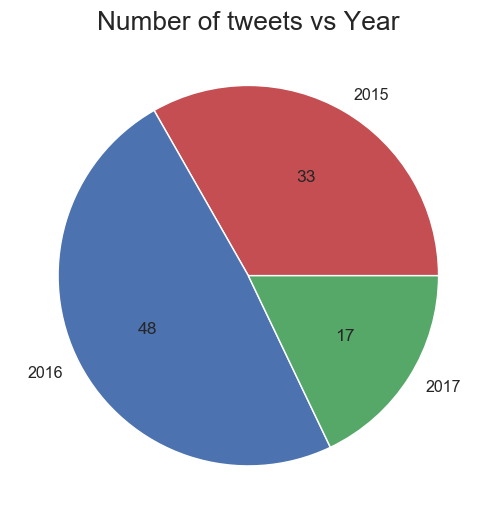

In [158]:
sns.set()
# setting the background of the figure

plt.figure(figsize = (8,6), dpi =105)
# we are plotting the figure by specifying the figure size and resolution

year_tweets = twitter_archive_master_clean.groupby('year')['tweet_id'].count()
# we are grouping by year to know the number of tweets made in particular year

plt.title('Number of tweets vs Year',fontsize=18)
# title for the graph

colors = ['r','b','g']
# setting the color for each portion of the piechart

plt.pie(year_tweets.values,labels=year_tweets.index,colors = colors,autopct = '%d')
# plotting piechart for the  years with respective color for their portion

plt.show()
# Display the figure

#### We see that 48% of the tweets are made in the year 2016,while 33% and 17% of the tweets in the year 2015 and 2017.

## Number of Retweets vs Month

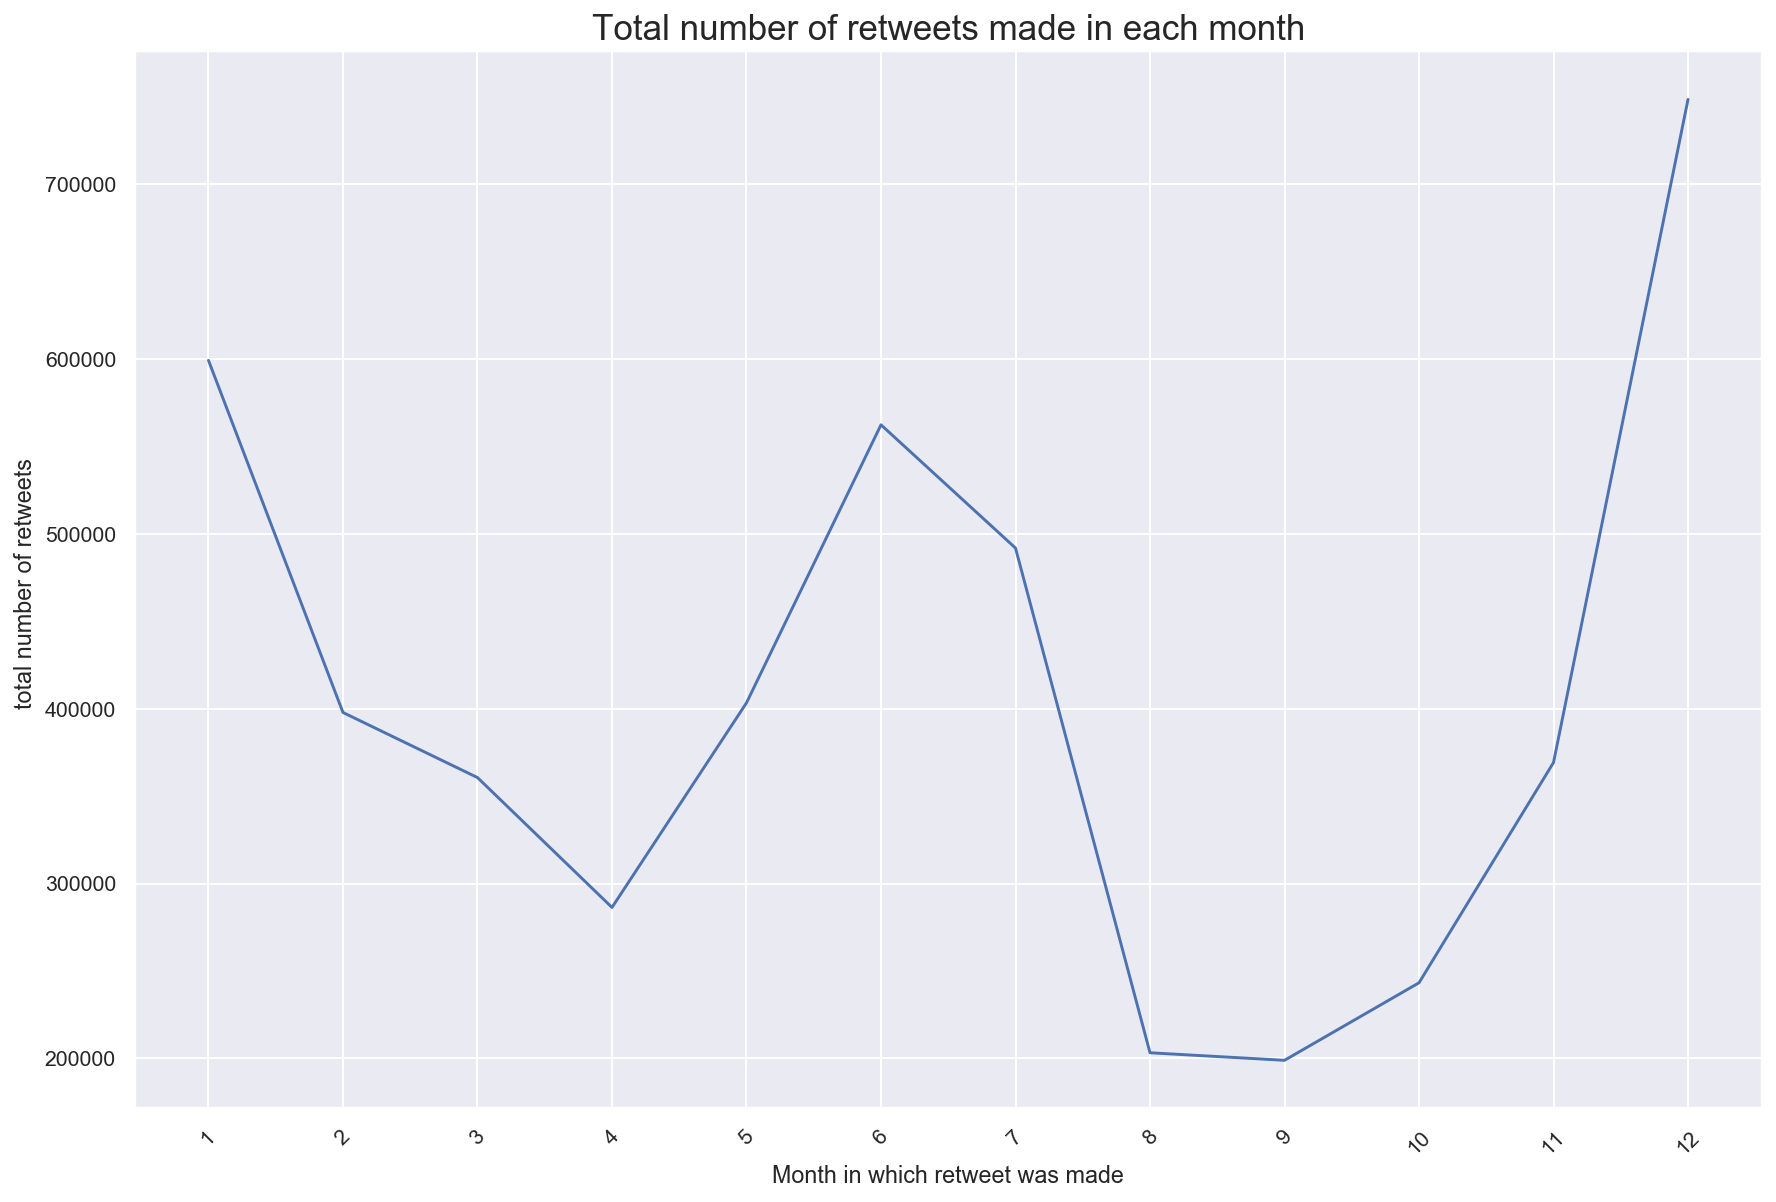

In [159]:
sns.set()
# setting the background of the figure

total_retweets_by_month = twitter_archive_master_clean.groupby('month')['retweet_count'].sum()
# We are grouping by month and  retweet_count so that we get the total number of retweets in each month.

plt.figure(figsize=(15,10),dpi=140)
# we are plotting the figure by specifying the figure size and resolution

plt.xlabel('Month in which retweet was made', fontsize = 12)
# we are setting the label for x-axis  using specified  fontsize 

plt.ylabel('total number of retweets ', fontsize = 12)
# we are setting the label for y-axis  using specified  fontsize

plt.title('Total number of retweets made in each month',fontsize=18)
# we are specifying the name for the title of the graph

plt.plot(np.arange(1,13),total_retweets_by_month)
# we are plotting the line graph

plt.xticks(np.arange(1,13),rotation = 45)
# setting the tick labels for the x-axis at an angle of 45 degrees

plt.show()
# Displaying the figure

#### We see that most number of retweets were made in the month of December while least number of retweets were made in the month of September.

## Top 10 Dog Breeds

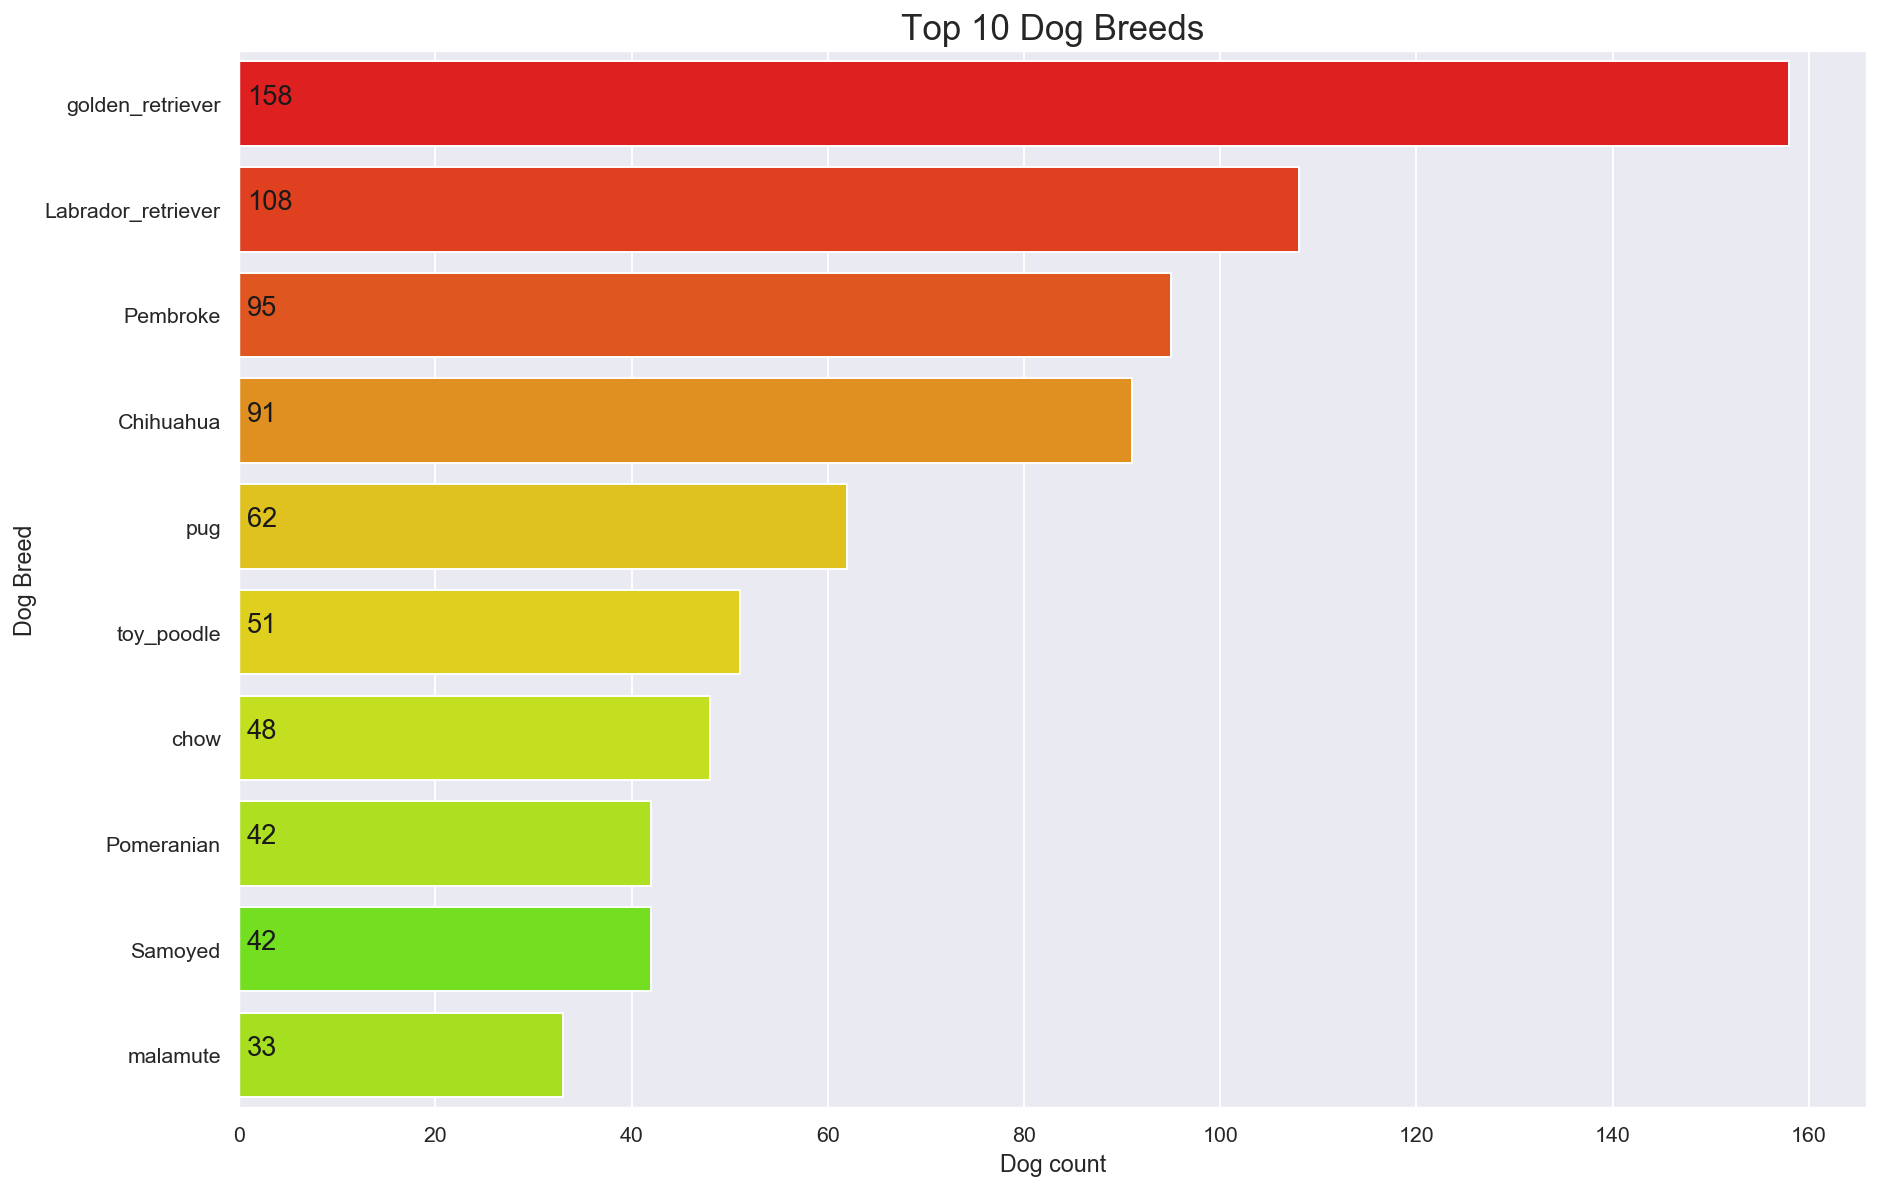

In [169]:
sns.set()
# setting the background of the figure

plt.figure(figsize=(15,10),dpi=140)
# we are plotting the figure by specifying the figure size and resolution

top_10_dog_types = twitter_archive_master_clean.dog_type.value_counts()[:10]
# top 10 dog breeds 

c = plt.cm.prism 
# Linear segmented color map

plt.title("Top 10 Dog Breeds", fontsize=18)
# title for the graph

plt.xlabel('Dog count', fontsize=12)
# we are setting the label for x-axis  using specified  fontsize 


plt.ylabel('Dog Breed', fontsize=12)
# we are setting the label for y-axis  using specified  fontsize 


sns.barplot(top_10_dog_types.values, top_10_dog_types.index,
            palette=[c(0.1),c(0.2),c(0.3),c(0.4),c(0.5),c(0.6),c(0.7),c(0.8),c(0.9),c(0.99)])

# barplot of top 10 dog types with palette (colors to use for the different levels of the graph)

for i, v in enumerate(top_10_dog_types.values): # Enumerated object

    plt.text(0.8,i,v,color='k',fontsize=14) #plotting  text for each level
    
    


#### We see that golden retriever is the most common dog breed in this dataset.

## Various stages of Dogs

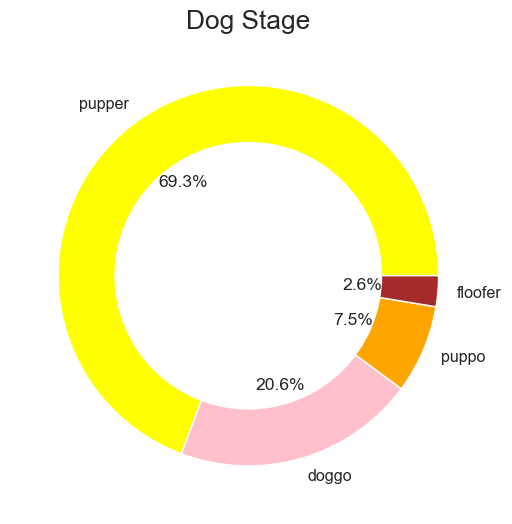

In [182]:
sns.set()
# setting the background of the figure

plt.figure(figsize = (8,6), dpi =105)
# we are plotting the figure by specifying the figure size and resolution

plt.title('Dog Stage',fontsize=18)
# title for the graph

dog_stage = twitter_archive_master_clean.dogs_stage.value_counts()
# various stages of dogs

colors = ['yellow','pink','orange','brown']
# colors for each portio of the donut plot

my_circle = plt.Circle((0,0),0.7,color ='white')
#create a circle with radius 0.7

plt.pie(dog_stage.values, labels=dog_stage.index, colors=colors,autopct = '%1.1f%%' )
# plotting donut plot with respective colors and their repective % (portion) to the data.

p=plt.gcf()
# Get the current figure.

p.gca().add_artist(my_circle)
# get the axes

plt.show()
# Display the figure

#### We see that most of the dogs are puppers i.e.69.3% while floofers are least i.e. 2.6% in the dataset.

## Highest favorite count Dog

In [203]:
favorite_count_dog = twitter_archive_master_clean.sort_values(by = 'favorite_count',ascending = False)

In [236]:
highest_favorite_count_dog = favorite_count_dog.loc[:,['favorite_count','jpg_url','dog_type','confidence']].head(1)

In [237]:
highest_favorite_count_dog

favorite_count                                                                                  jpg_url            dog_type confidence
1718        155583.0  https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg  Labrador_retriever   0.825333

In [246]:
response = requests.get('https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg')

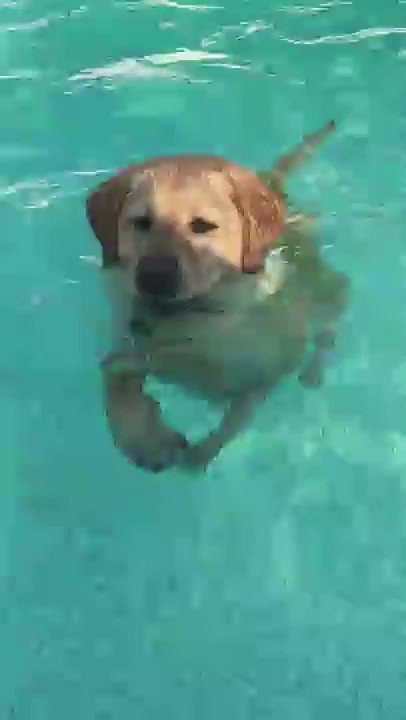

In [247]:
Image.open(BytesIO(response.content))

#### We see that the highest favorite count dog is labrador retriever which is same as our prediction with 82% confidence.

## Highest Confidence Dog

In [264]:
confidence_dog = twitter_archive_master_clean.sort_values(by = 'confidence',ascending = False)

In [265]:
highest_confidence_dog = retweet_count_dog.loc[:,['jpg_url','dog_type','confidence']].head(1)

In [266]:
highest_confidence_dog 

jpg_url  dog_type confidence
732  https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg  komondor   0.999956

In [272]:
response = requests.get('https://pbs.twimg.com/media/CUd5gBGWwAA0IVA.jpg')

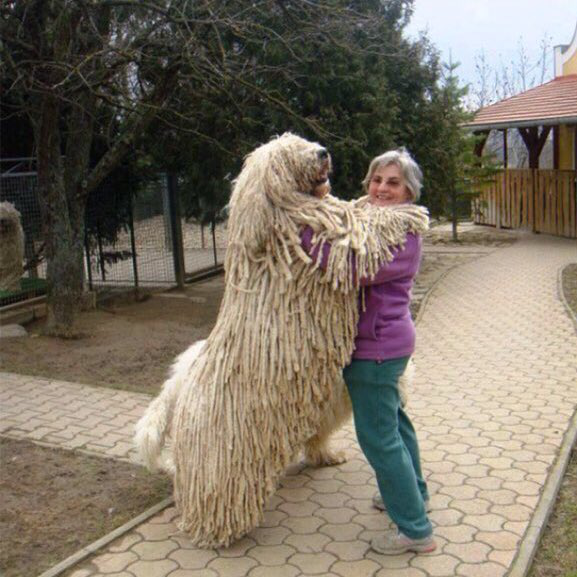

In [273]:
Image.open(BytesIO(response.content))

#### We see that the highest confidence dog is komondor which is same as our prediction with 99.99% confidence.

## References

https://pandas.pydata.org/docs/getting_started/tutorials.html

https://seaborn.pydata.org/

https://medium.com/

https://towardsdatascience.com/

https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html